In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import string

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

#from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from joblib import dump, load

In [2]:
#!chmod 644 train.csv
#!chmod 644 test.csv

In [3]:
df = pd.read_csv("test.csv")

In [4]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [5]:
df.shape

(200000, 24)

In [6]:
df = df.drop("id", axis=1)

In [7]:
df1 = df._get_numeric_data()

In [8]:
df2 = df.select_dtypes(include='object')

In [9]:
assert df.shape[1] == df1.shape[1] + df2.shape[1]

In [10]:
len(df2["nom_7"].unique())

1219

In [11]:
for col in df2.columns:
    print(col, ": ", df2[col].unique())
    print("****************************************************************")

bin_3 :  ['T' 'F']
****************************************************************
bin_4 :  ['Y' 'N']
****************************************************************
nom_0 :  ['Blue' 'Red' 'Green']
****************************************************************
nom_1 :  ['Triangle' 'Square' 'Star' 'Trapezoid' 'Polygon' 'Circle']
****************************************************************
nom_2 :  ['Axolotl' 'Lion' 'Dog' 'Cat' 'Snake' 'Hamster']
****************************************************************
nom_3 :  ['Finland' 'Canada' 'China' 'Russia' 'India' 'Costa Rica']
****************************************************************
nom_4 :  ['Piano' 'Oboe' 'Theremin' 'Bassoon']
****************************************************************
nom_5 :  ['0870b0a5d' 'a5c276589' '568550f04' 'c5725677e' 'e70a6270d' '552e3fdc9'
 'dbfb714a4' '19db35594' '9bb7ea2da' 'e5b29c42b' 'defc6dd20' '2cac4af40'
 'bd40c81f3' 'e9f44a509' '83b38aa6b' '2e7f4d636' '4604905e7' '5d18641ff'
 '472

In [12]:
#int("50f116bcf", 16)

In [13]:
cols = ["nom_{}".format(i) for i in range(5, 10)]
#df2[df2.columns[df2.columns.str.contains("nom_")]]
cols

['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

In [14]:
for col in cols:
    df2[col] = df2[col].apply(lambda x: int(x, 16))

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
'''
res = []
for col in cols:
    res.extend(list(df2[col].unique()))

mysnom = list(set(res))

le = LabelEncoder()
le.fit(mysnom)

for col in cols:
    df2[col] = le.transform(df2[col])
'''

In [15]:
df2[cols].corr()

,nom_5,nom_6,nom_7,nom_8,nom_9
nom_5,1.000000,-0.001351,0.002081,-0.000744,-0.000122
nom_6,-0.001351,1.000000,-0.001005,0.000772,0.004237
nom_7,0.002081,-0.001005,1.000000,-0.001859,0.001225
nom_8,-0.000744,0.000772,-0.001859,1.000000,-0.000273
nom_9,-0.000122,0.004237,0.001225,-0.000273,1.000000


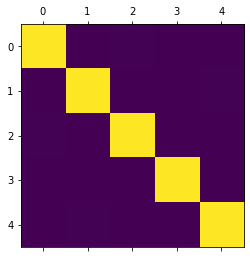

In [16]:
plt.matshow(df2[cols].corr())
plt.show()

In [17]:
df2

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,T,Y,Blue,Triangle,Axolotl,Finland,Piano,2265647709,42122452438,22296456387,42162663948,16183411384,Novice,Warm,j,P,be
1,T,N,Red,Square,Lion,Canada,Piano,44495758729,7205044802,5073101257,18973132188,10829107317,Master,Lava Hot,l,A,RP
2,F,Y,Blue,Square,Dog,China,Piano,23225241348,8557928957,10694291519,49217937904,29849011519,Expert,Freezing,a,G,tP
3,T,Y,Red,Star,Cat,China,Piano,53001676670,44648550080,13092764940,3068946687,48819854532,Contributor,Lava Hot,b,Q,ke
4,F,N,Red,Trapezoid,Dog,China,Piano,62019479309,40725263640,44060663909,66873176558,40396368329,Grandmaster,Lava Hot,l,W,qK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,F,N,Green,Square,Lion,Canada,Theremin,29143040461,44030385938,55879053498,42491588960,46375446815,Novice,Lava Hot,j,A,Gb
199996,F,Y,Green,Trapezoid,Lion,China,Piano,12181934306,22020123874,56598899675,55764877008,63052203728,Contributor,Lava Hot,f,S,Ed
199997,T,Y,Green,Trapezoid,Lion,Canada,Oboe,19465791065,10842633547,9264300030,4572564844,13922193227,Novice,Boiling Hot,g,V,TR
199998,T,Y,Blue,Star,Hamster,Costa Rica,Bassoon,67060087699,12530182341,68442683966,25881776907,57125734365,Grandmaster,Boiling Hot,g,X,Ye


In [18]:
cols = ["nom_{}".format(i) for i in range(0, 5)]
#df2[df2.columns[df2.columns.str.contains("nom_")]]
cols

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']

In [19]:
for col in cols:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
#pd.factorize(df2["nom_5"])

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
for col in df2.columns:
    if col.startswith("bin_"):
        le = LabelEncoder()
        le.fit(df2[col])
        df2[col] = le.transform(df2[col])

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
df2["ord_1"] = df2["ord_1"].map({"Novice":0, "Contributor":1, "Expert":2, "Master":3, "Grandmaster":4})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df2["ord_2"].unique()

array(['Warm', 'Lava Hot', 'Freezing', 'Boiling Hot', 'Hot', 'Cold'],
      dtype=object)

In [23]:
df2["ord_2"] = df2["ord_2"].map({"Freezing":0, "Cold":1, "Warm":2, "Hot":3, "Boiling Hot":4, "Lava Hot":5})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df2["ord_3"] = df2["ord_3"].map({k:v for v,k in enumerate(list(string.ascii_lowercase))})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2["ord_4"] = df2["ord_4"].map({k:v for v,k in enumerate(list(string.ascii_uppercase))})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
list1 = list(string.ascii_lowercase)

In [27]:
list2 = list(string.ascii_uppercase)

In [28]:
list1.extend(list2)

In [29]:
list1

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [30]:
df2["ord_5"].apply(lambda x: x[0]).map({k:v*10 for v,k in enumerate(list1)})

0          10
1         430
2         190
3         100
4         160
         ... 
199995    320
199996    300
199997    450
199998    500
199999     40
Name: ord_5, Length: 200000, dtype: int64

In [31]:
df2["ord_5"] = df2["ord_5"].apply(lambda x: x[0]).map({k:v*10 for v,k in enumerate(list1)}) +\
df2["ord_5"].apply(lambda x: x[1]).map({k:v for v,k in enumerate(list1)})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df2

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,1,0,5,0,3,2,2265647709,42122452438,22296456387,42162663948,16183411384,0,2,9,15,14
1,1,0,2,2,4,0,2,44495758729,7205044802,5073101257,18973132188,10829107317,3,5,11,0,471
2,0,1,0,2,2,1,2,23225241348,8557928957,10694291519,49217937904,29849011519,2,0,0,6,231
3,1,1,2,3,1,1,2,53001676670,44648550080,13092764940,3068946687,48819854532,1,5,1,16,104
4,0,0,2,4,2,1,2,62019479309,40725263640,44060663909,66873176558,40396368329,4,5,11,22,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,1,2,4,0,3,29143040461,44030385938,55879053498,42491588960,46375446815,0,5,9,0,321
199996,0,1,1,4,4,1,2,12181934306,22020123874,56598899675,55764877008,63052203728,1,5,5,18,303
199997,1,1,1,4,4,0,1,19465791065,10842633547,9264300030,4572564844,13922193227,0,4,6,21,493
199998,1,1,0,3,3,2,0,67060087699,12530182341,68442683966,25881776907,57125734365,4,4,6,23,504


In [33]:
#df2_ = pd.get_dummies(df2)

In [34]:
df2.shape

(200000, 17)

In [35]:
df = pd.concat([df1, df2], axis=1)

In [36]:
del [df2, df1]

In [37]:
df.shape

(200000, 23)

In [38]:
#df["target"].plot.hist();

In [39]:
df[df.columns[df.columns.str.contains("nom_")]].corr()

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
nom_0,1.000000,0.000227,-0.002429,0.004435,-0.003597,-0.000867,-0.000177,-0.000449,0.000871,-0.003431
nom_1,0.000227,1.000000,0.000442,0.001129,0.003844,0.003373,-0.000539,0.000963,-0.002600,-0.001657
nom_2,-0.002429,0.000442,1.000000,-0.000103,0.001188,0.002425,0.001278,-0.001175,-0.003270,-0.001604
nom_3,0.004435,0.001129,-0.000103,1.000000,0.001269,-0.000811,0.000707,0.001200,-0.000388,0.004420
nom_4,-0.003597,0.003844,0.001188,0.001269,1.000000,-0.002982,0.001535,0.003056,-0.001116,-0.003026
nom_5,-0.000867,0.003373,0.002425,-0.000811,-0.002982,1.000000,-0.001351,0.002081,-0.000744,-0.000122
nom_6,-0.000177,-0.000539,0.001278,0.000707,0.001535,-0.001351,1.000000,-0.001005,0.000772,0.004237
nom_7,-0.000449,0.000963,-0.001175,0.001200,0.003056,0.002081,-0.001005,1.000000,-0.001859,0.001225
nom_8,0.000871,-0.002600,-0.003270,-0.000388,-0.001116,-0.000744,0.000772,-0.001859,1.000000,-0.000273
nom_9,-0.003431,-0.001657,-0.001604,0.004420,-0.003026,-0.000122,0.004237,0.001225,-0.000273,1.000000


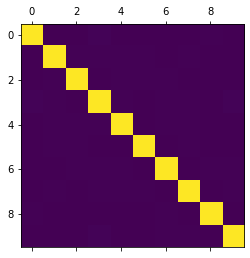

In [40]:
plt.matshow(df[df.columns[df.columns.str.contains("nom_")]].corr())
plt.show()

In [55]:
#y = df["target"].values

In [56]:
#df.drop(["target"], axis=1, inplace=True)

In [41]:
X = df.values

In [42]:
del df

In [43]:
#print(X.shape, y.shape)
print(X.shape)

(200000, 23)


In [60]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
clf = load('clf.joblib') 

In [227]:
#clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, 
#                                 max_depth=7, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

0.7443535353535353

In [ ]:
#clf = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.01, 
#                                 max_depth=15, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [ ]:
#clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, 
#                                 max_depth=7, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [ ]:
#dump(clf, 'clf.joblib') 

In [46]:
# test
df = pd.read_csv("test.csv")
df["target"] = clf.predict(X)
sub = df[["id", "target"]]
sub.to_csv("submission.csv", index=False)